In [66]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
df = pd.read_excel('stress_strain_curva.xlsx')

In [68]:
df1 = df.iloc[:,1:3]

In [69]:
len(df1['Strain'])

461

In [70]:
a,b=[],[]
q=np.arange(1,284,1)
for i in range(len(q)):
    x=df1[['Strain']][:q[i]]
    y=df1[['Stress']][:q[i]]
    from sklearn.linear_model import LinearRegression
    lr_model = LinearRegression()
    lr_model.fit(x,y)
    a.append(lr_model.coef_)
    if len(a)!=0:
        b.append(a[i]-a[i-1])
    y_pred = []
    for j in x.values.tolist():
        y_pred.append(lr_model.predict([j])[0][0])

In [71]:
stress = y.values.tolist()
strain = x.values.tolist()

strain_diff, stress_diff, young_modulus = [], [], []
strain_diff.append(strain[0][0])
stress_diff.append(stress[0][0])
for i in range(len(stress)):
    stress_diff.append(stress[i][0]-stress[0][0])
    strain_diff.append(strain[i][0]-strain[0][0])
    if strain_diff[i]!=0.0:
        young_modulus.append(stress_diff[i]/strain_diff[i])

In [72]:
len(young_modulus)
young_modulus.append(young_modulus[-1])
young_modulus.append(young_modulus[-1])

In [73]:
c=[]
for i in range(len(b)):
    c.append(b[i][0][0])


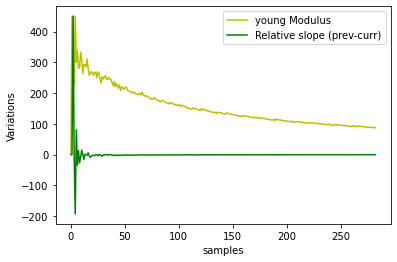

In [74]:
plt.plot(np.arange(0,len(young_modulus)),young_modulus,'y', label = 'young Modulus')
plt.plot(np.arange(0,len(young_modulus)),c,'g', label = 'Relative slope (prev-curr)')
plt.legend()
plt.xlabel('samples')
plt.ylabel('Variations')
plt.savefig('young_modulus.png')

In [9]:
x=df1[['Strain']][:40]
y=df1[['Stress']][:40]
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x,y)
y_pred = []
for i in x.values.tolist():
    y_pred.append(lr_model.predict([i])[0][0])


SSxx = np.square(x.values).sum() - (np.sum(x.values)*np.sum(x.values))/len(x.values)
SSxy = np.multiply(x.values,y.values).sum() - (np.sum(x.values))*(np.sum(y.values))/len(x.values)
y_mean = np.average(y.values)
x_mean = np.average(x.values)
beta_1 = SSxy/SSxx
beta_0 = y_mean - beta_1*x_mean
y_LSR = beta_1*(x) + beta_0

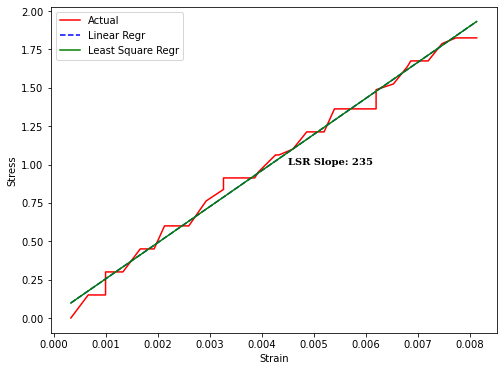

In [30]:
plt.figure(figsize=(8,6))
plt.plot(x,y,'r',label = 'Actual');
plt.plot(x,y_pred,'--b',label = 'Linear Regr');
plt.plot(x,y_LSR,'g',label = 'Least Square Regr');
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.legend()
plt.text(0.0045,1,f'LSR Slope: {int(beta_1)}',fontfamily='serif',fontweight = 'bold',fontsize = 'medium')
plt.savefig('1.png')